## Model 16 - with Quality of life data (728 observations!!)

### Target:
+ life_ladder  

### Features from Happiness:
Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perception of corruption
+ positive affect

Model 5 KNN has the best balance between train/test prediction metrics, I want to use this model as basis for the new features with so much less observations
### Features from Quality:



import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_16'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_and_quality_life_combined.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            728 non-null    int64  
 1   country_name                      728 non-null    object 
 2   life_ladder                       728 non-null    float64
 3   quality_of_life_index             728 non-null    float64
 4   purchasing_power_index            728 non-null    float64
 5   crime_index                       728 non-null    float64
 6   health_care_index                 728 non-null    float64
 7   cost_of_living_index              728 non-null    float64
 8   pollution_index                   728 non-null    float64
 9   log_gdp_per_capita                728 non-null    float64
 10  social_support                    728 non-null    float64
 11  healthy_life_expectancy_at_birth  728 non-null    float64
 12  freedom_

Define features and Target:

In [6]:
df.columns

Index(['year_x', 'country_name', 'life_ladder', 'quality_of_life_index',
       'purchasing_power_index', 'crime_index', 'health_care_index',
       'cost_of_living_index', 'pollution_index', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect'],
      dtype='object')

In [7]:
features = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
                  'freedom_to_make_life_choices','perceptions_of_corruption', 'positive_affect']

X = df[features]
y = df['life_ladder']

In [8]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect'],
      dtype='object')

In [9]:
print(X.shape, y.shape)

(728, 6) (728,)


Train-Test-Split:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=123)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(582, 6) (146, 6) (582,) (146,)


In [12]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,10.147746,0.862029,67.661821,0.787101,0.710584,0.667904
std,0.694597,0.097667,4.027023,0.128432,0.220549,0.105292
min,7.602000,0.404000,50.500000,0.333000,0.047000,0.263000
25%,9.628000,0.823250,65.760000,0.715250,0.606750,0.590000
50%,10.253500,0.896000,68.145000,0.817000,0.786000,0.694000
75%,10.690250,0.928000,70.857500,0.889000,0.877750,0.752000
max,11.660000,0.983000,74.350000,0.965000,0.977000,0.884000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [14]:
X_train_scaled.shape

(582, 6)

In [15]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [16]:
lin_reg_error_lst = []

for i in range(1,4):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_16_lin_reg_2,0.420,0.814,0.312,0.056,0.440,0.811,0.330,0.060,0.020,0.018,0.003
0,model_16_lin_reg_1,0.470,0.769,0.335,0.061,0.510,0.745,0.371,0.068,0.040,0.036,0.024
2,model_16_lin_reg_3,0.328,0.887,0.241,0.042,0.633,0.608,0.353,0.062,0.305,0.112,0.279


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52311/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


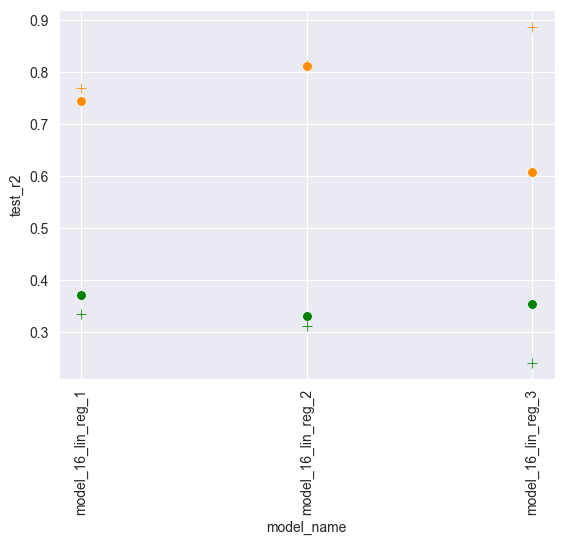

In [17]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [18]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_16_lin_reg_scaler_0,0.757
1,model_16_lin_reg_scaler_1,0.757
2,model_16_lin_reg_scaler_2,0.757


part df with the best models:

In [19]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_16_lin_reg_2,0.420,0.814,0.312,0.056,0.440,0.811,0.330,0.060,0.020,0.018,0.003
0,model_16_lin_reg_1,0.470,0.769,0.335,0.061,0.510,0.745,0.371,0.068,0.040,0.036,0.024
2,model_16_lin_reg_3,0.328,0.887,0.241,0.042,0.633,0.608,0.353,0.062,0.305,0.112,0.279


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [20]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(45,71,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
7,model_16_knn_2_50,0.465,0.773,0.334,0.062,0.508,0.748,0.369,0.070,0.043,0.035,0.025
6,model_16_knn_2_45,0.459,0.779,0.328,0.061,0.502,0.753,0.364,0.069,0.043,0.036,0.026
12,model_16_knn_3_45,0.459,0.779,0.329,0.061,0.505,0.751,0.365,0.069,0.046,0.036,0.028
4,model_16_knn_1_65,0.485,0.753,0.348,0.065,0.523,0.732,0.384,0.073,0.038,0.036,0.021
5,model_16_knn_1_70,0.491,0.747,0.353,0.066,0.528,0.727,0.389,0.074,0.037,0.036,0.020
15,model_16_knn_3_60,0.480,0.758,0.344,0.064,0.525,0.730,0.381,0.072,0.045,0.037,0.028
13,model_16_knn_3_50,0.467,0.771,0.334,0.062,0.512,0.743,0.372,0.070,0.045,0.038,0.028
8,model_16_knn_2_55,0.471,0.767,0.337,0.063,0.516,0.740,0.375,0.071,0.045,0.038,0.027
14,model_16_knn_3_55,0.473,0.765,0.338,0.063,0.519,0.737,0.376,0.071,0.046,0.038,0.028
0,model_16_knn_1_45,0.460,0.778,0.329,0.061,0.499,0.756,0.368,0.070,0.039,0.039,0.022


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52311/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


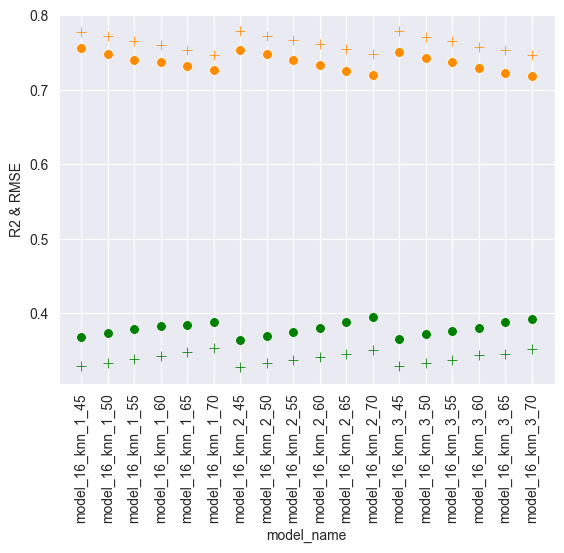

In [21]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [22]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
6,model_16_knn_2_45,0.459,0.779,0.328,0.061,0.502,0.753,0.364,0.069,0.043,0.036,0.026
12,model_16_knn_3_45,0.459,0.779,0.329,0.061,0.505,0.751,0.365,0.069,0.046,0.036,0.028
0,model_16_knn_1_45,0.460,0.778,0.329,0.061,0.499,0.756,0.368,0.070,0.039,0.039,0.022
7,model_16_knn_2_50,0.465,0.773,0.334,0.062,0.508,0.748,0.369,0.070,0.043,0.035,0.025
13,model_16_knn_3_50,0.467,0.771,0.334,0.062,0.512,0.743,0.372,0.070,0.045,0.038,0.028
1,model_16_knn_1_50,0.466,0.772,0.333,0.062,0.508,0.748,0.374,0.071,0.042,0.041,0.024


scaling data

In [23]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_16_knn_scaler_1,0.756
2,model_16_knn_scaler_2,0.753
0,model_16_knn_scaler_0,0.656


Decision Tree Model

In [24]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [25]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.445
train_r2  0.792
train_mae  0.337
train_mape  0.06
test_rmse  0.503
test_r2  0.752
test_mae  0.389
test_mape  0.07


In [26]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

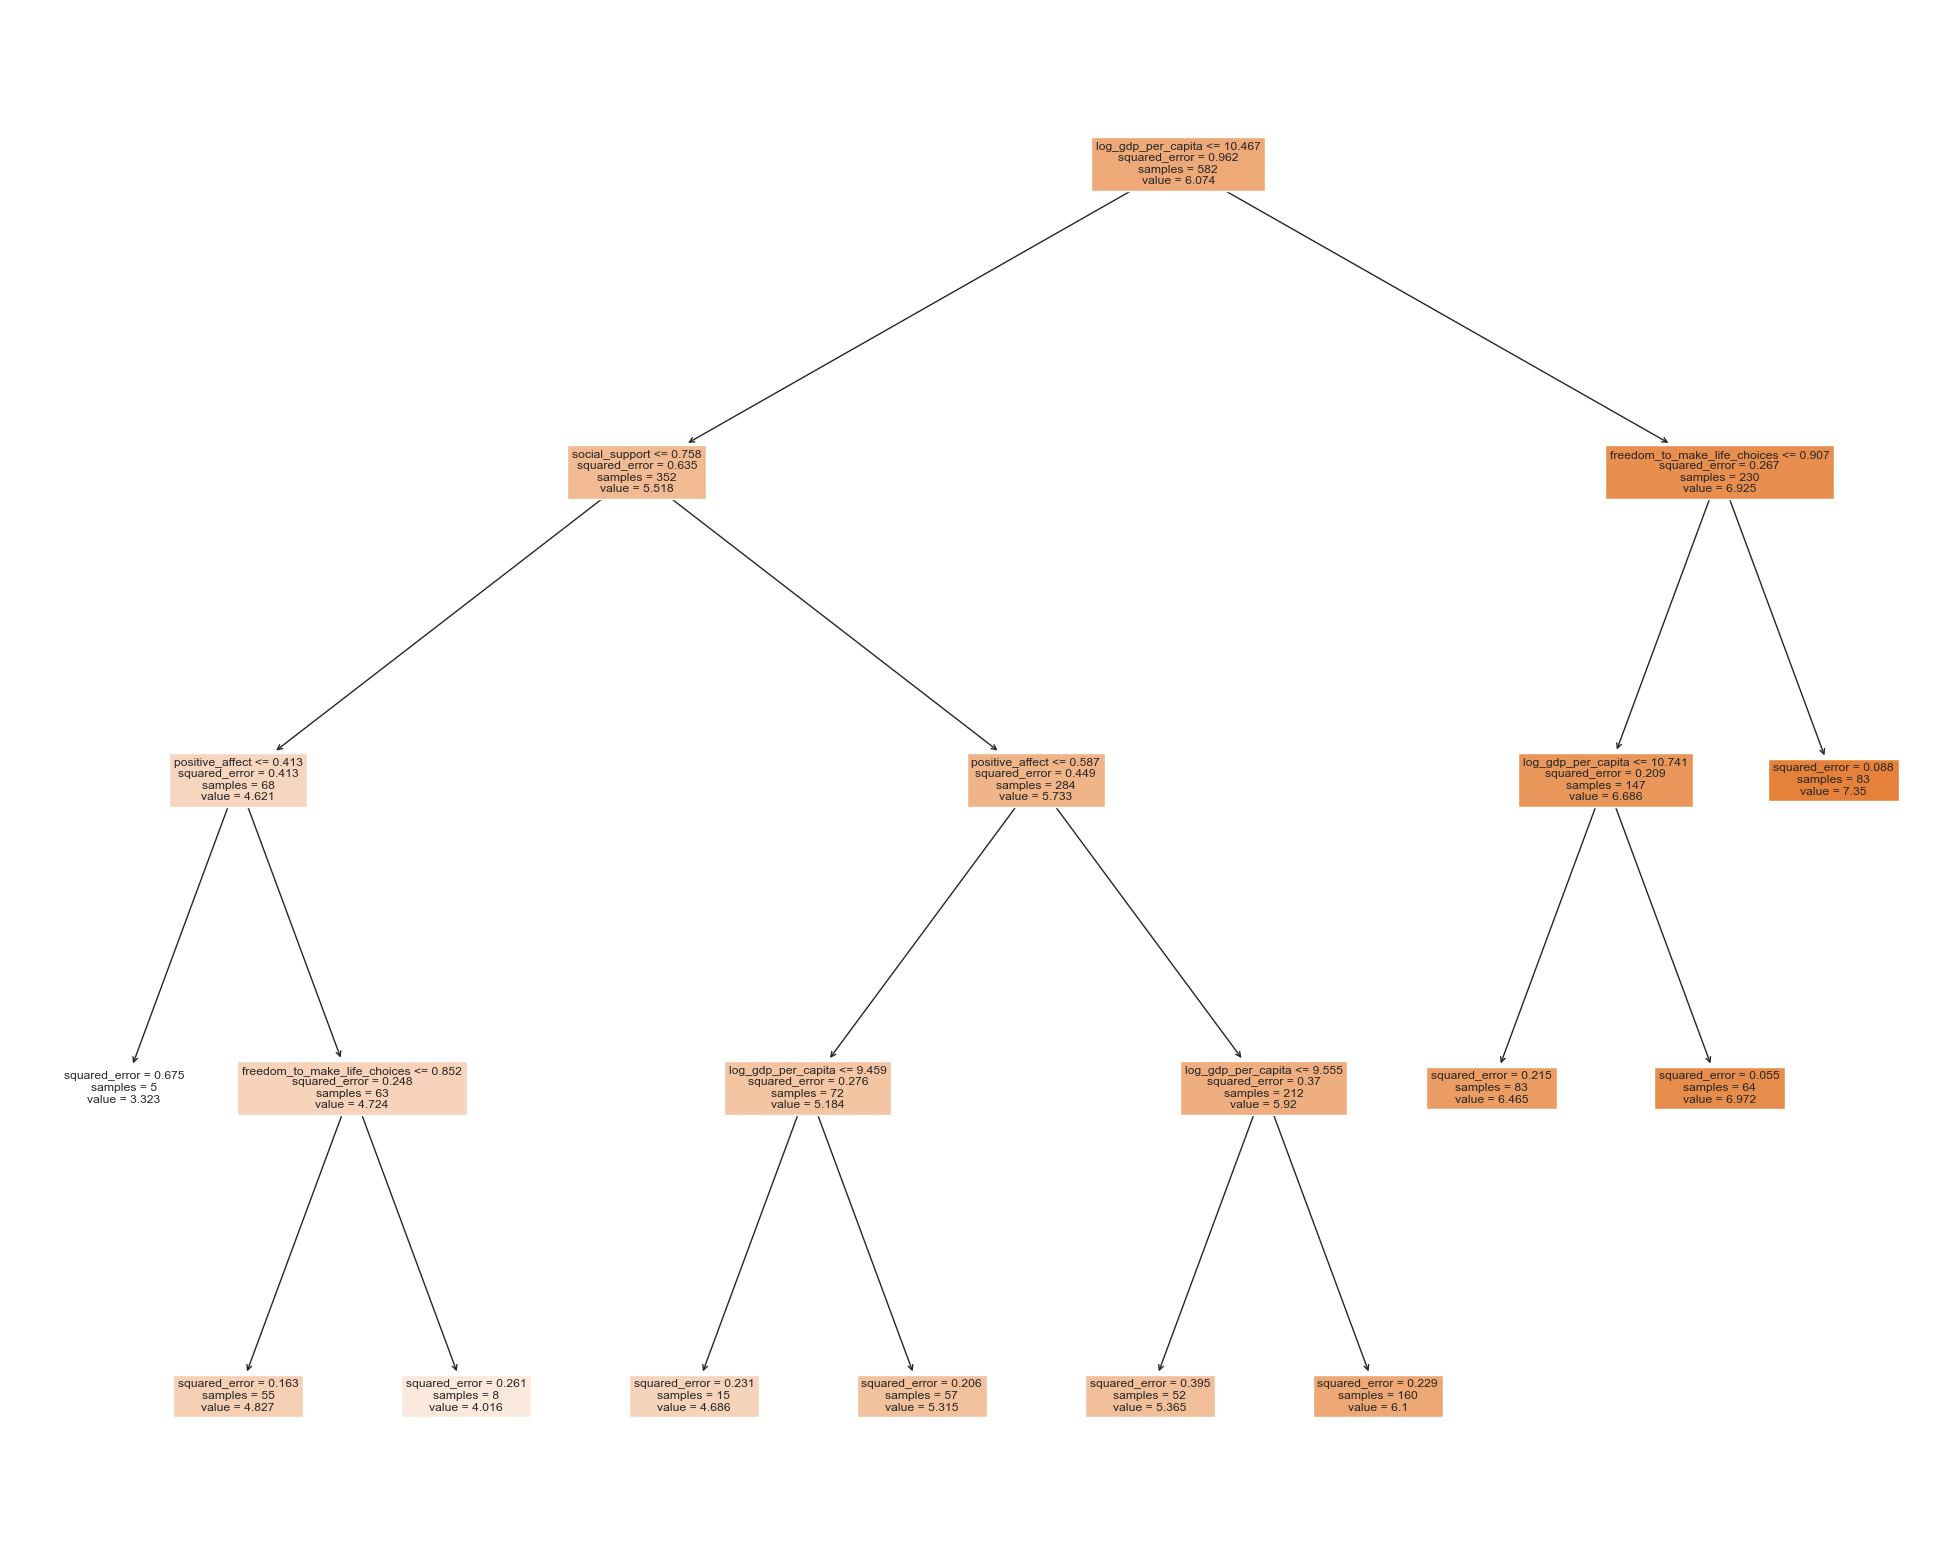

In [27]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [28]:
dectree_error_lst = []
for depth in np.arange(3,5,1):
    for leaf in np.arange(10,46,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_16_dectree_dep_3_max_leaf_10,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
1,model_16_dectree_dep_3_max_leaf_15,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
2,model_16_dectree_dep_3_max_leaf_20,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
3,model_16_dectree_dep_3_max_leaf_25,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
4,model_16_dectree_dep_3_max_leaf_30,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
5,model_16_dectree_dep_3_max_leaf_35,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
6,model_16_dectree_dep_3_max_leaf_40,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
7,model_16_dectree_dep_3_max_leaf_45,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
9,model_16_dectree_dep_4_max_leaf_15,0.423,0.813,0.313,0.055,0.462,0.791,0.352,0.063,0.039,0.039,0.022
10,model_16_dectree_dep_4_max_leaf_20,0.421,0.814,0.312,0.055,0.462,0.791,0.352,0.063,0.041,0.040,0.023


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52311/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


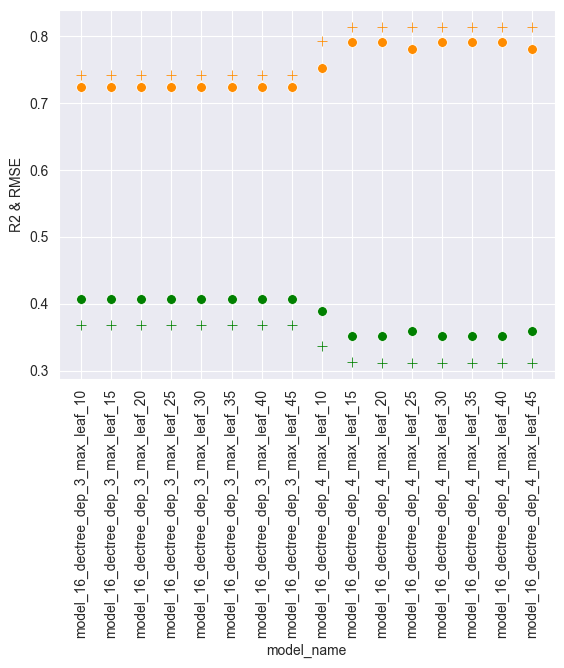

In [29]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

part df for the best models:

In [30]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_16_dectree_dep_3_max_leaf_10,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
1,model_16_dectree_dep_3_max_leaf_15,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
2,model_16_dectree_dep_3_max_leaf_20,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
3,model_16_dectree_dep_3_max_leaf_25,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
4,model_16_dectree_dep_3_max_leaf_30,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018
5,model_16_dectree_dep_3_max_leaf_35,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018


Random Forest 

randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

In [31]:
random_trees_error_lst = []
for tree_depth in np.arange(4,6,1):
    for tree_leaf in np.arange(15,31,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[P

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_16_forest_tree_depth4_max_leaf_15,0.380,0.849,0.281,0.051,0.441,0.810,0.336,0.062,0.061,0.055,0.039,28,4,100
1,model_16_forest_tree_depth4_max_leaf_20,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
2,model_16_forest_tree_depth4_max_leaf_25,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
3,model_16_forest_tree_depth4_max_leaf_30,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
4,model_16_forest_tree_depth5_max_leaf_15,0.364,0.861,0.273,0.049,0.432,0.817,0.332,0.061,0.068,0.059,0.044,29,5,100
7,model_16_forest_tree_depth5_max_leaf_30,0.330,0.886,0.246,0.044,0.405,0.839,0.307,0.056,0.075,0.061,0.047,57,5,100
5,model_16_forest_tree_depth5_max_leaf_20,0.344,0.876,0.257,0.046,0.416,0.831,0.318,0.058,0.072,0.061,0.045,39,5,100
6,model_16_forest_tree_depth5_max_leaf_25,0.333,0.883,0.248,0.045,0.408,0.837,0.310,0.057,0.075,0.062,0.046,48,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52311/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


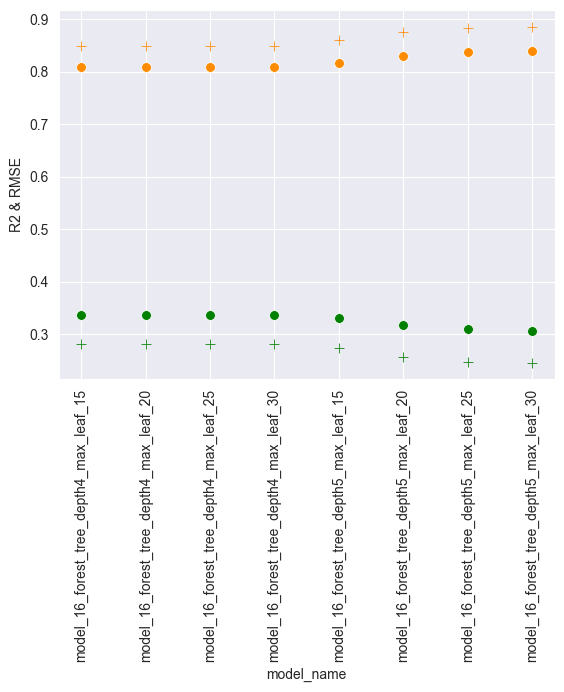

In [32]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [33]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:8]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_16_forest_tree_depth4_max_leaf_15,0.380,0.849,0.281,0.051,0.441,0.810,0.336,0.062,0.061,0.055,0.039,28,4,100
1,model_16_forest_tree_depth4_max_leaf_20,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
2,model_16_forest_tree_depth4_max_leaf_25,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
3,model_16_forest_tree_depth4_max_leaf_30,0.379,0.849,0.281,0.051,0.440,0.810,0.336,0.062,0.061,0.055,0.039,30,4,100
4,model_16_forest_tree_depth5_max_leaf_15,0.364,0.861,0.273,0.049,0.432,0.817,0.332,0.061,0.068,0.059,0.044,29,5,100
7,model_16_forest_tree_depth5_max_leaf_30,0.330,0.886,0.246,0.044,0.405,0.839,0.307,0.056,0.075,0.061,0.047,57,5,100
5,model_16_forest_tree_depth5_max_leaf_20,0.344,0.876,0.257,0.046,0.416,0.831,0.318,0.058,0.072,0.061,0.045,39,5,100
6,model_16_forest_tree_depth5_max_leaf_25,0.333,0.883,0.248,0.045,0.408,0.837,0.310,0.057,0.075,0.062,0.046,48,5,100


Test: AdaBoostRegressor

In [34]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_16_ada_boost,0.387,0.845,0.321,0.056,0.46,0.801,0.374,0.065,0.073,0.044,0.053


that is really nice!!

In [35]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [36]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                criterion= 'squared_error',
                                max_depth = 5, 
                                max_leaf_nodes = 25,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_16_gbr_boost,0.104,0.989,0.368,0.867,0.264,0.122


In [37]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 25,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [38]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
1,model_16_lin_reg_2,0.420,0.814,0.312,0.056,0.440,0.811,0.330,0.060,0.020,0.018,0.003,NaN,NaN,NaN
0,model_16_dectree_dep_3_max_leaf_10,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
1,model_16_dectree_dep_3_max_leaf_15,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
2,model_16_dectree_dep_3_max_leaf_20,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
3,model_16_dectree_dep_3_max_leaf_25,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
4,model_16_dectree_dep_3_max_leaf_30,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
5,model_16_dectree_dep_3_max_leaf_35,0.496,0.742,0.369,0.067,0.531,0.724,0.407,0.073,0.035,0.038,0.018,NaN,NaN,NaN
0,model_16_knn_1_45,0.460,0.778,0.329,0.061,0.499,0.756,0.368,0.070,0.039,0.039,0.022,NaN,NaN,NaN
1,model_16_knn_1_50,0.466,0.772,0.333,0.062,0.508,0.748,0.374,0.071,0.042,0.041,0.024,NaN,NaN,NaN
0,model_16_lin_reg_1,0.470,0.769,0.335,0.061,0.510,0.745,0.371,0.068,0.040,0.036,0.024,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52311/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


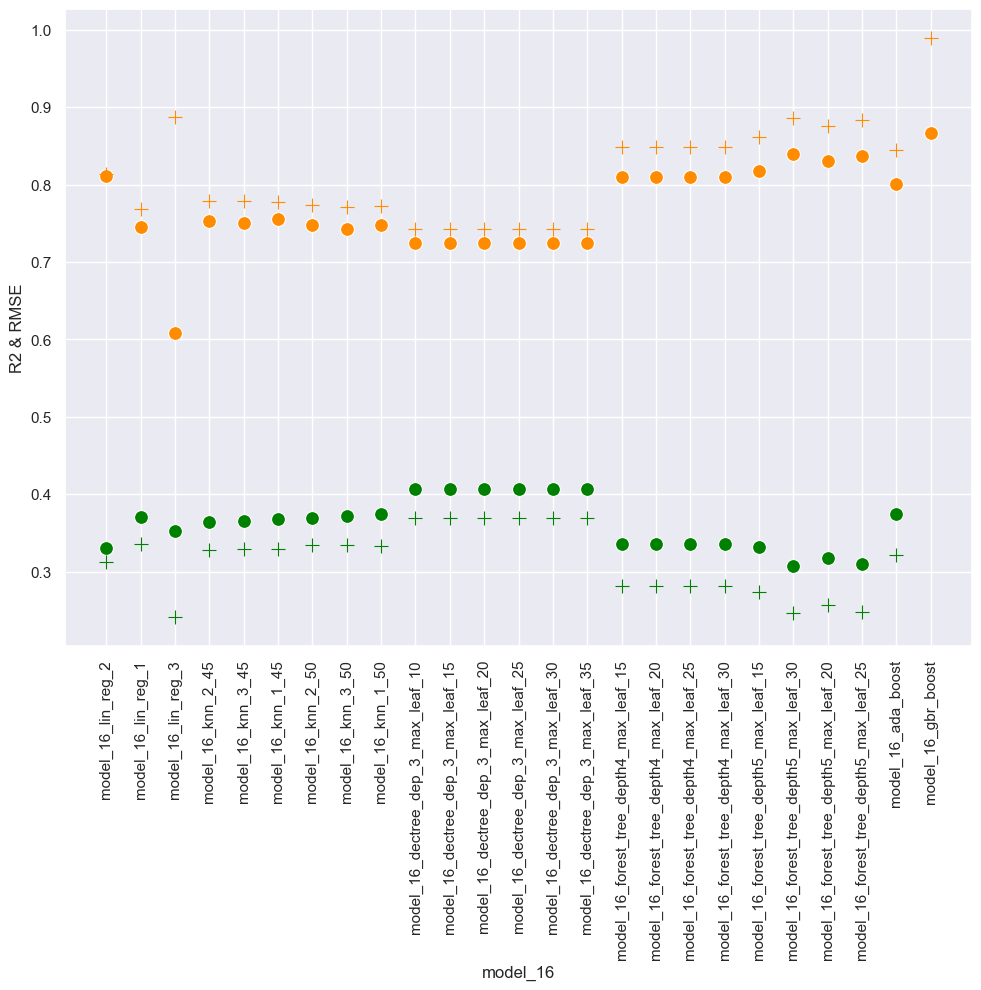

In [39]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [40]:
error_df[error_df['test_mape']==error_df['test_mape'].min()]

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
7,model_16_forest_tree_depth5_max_leaf_30,0.33,0.886,0.246,0.044,0.405,0.839,0.307,0.056,0.075,0.061,0.047,57.0,5.0,100.0


In [41]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)

In [42]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
3,freedom_to_make_life_choices,0.073149
2,healthy_life_expectancy_at_birth,0.128320
5,positive_affect,0.144029
1,social_support,0.175822
4,perceptions_of_corruption,0.188341
0,log_gdp_per_capita,0.290340


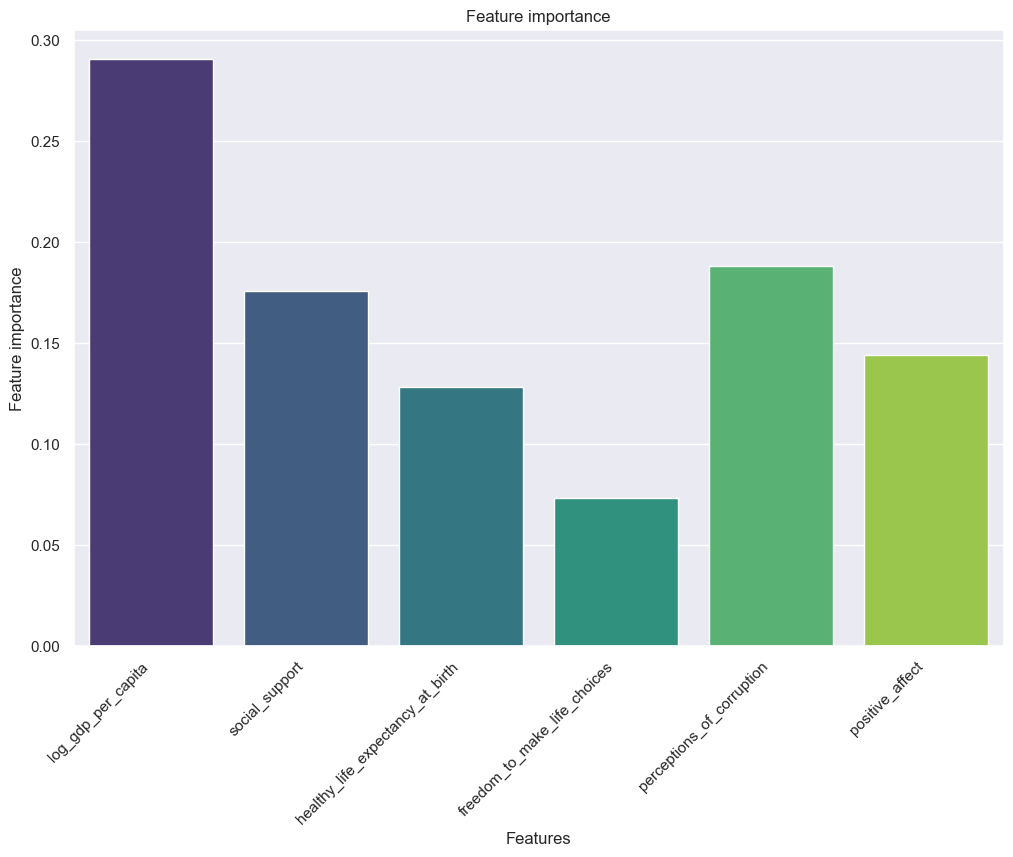

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()